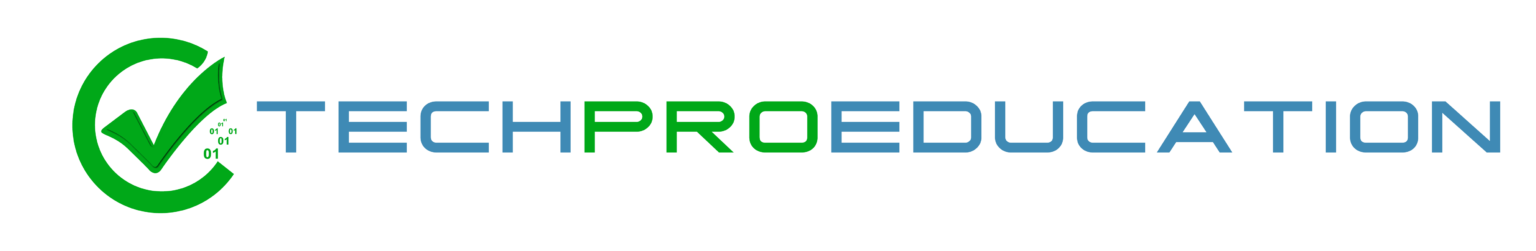

# Hand Written Digits Project

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score, classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

# Exploratory Data Analysis and Visualization

In [268]:
df = pd.read_csv('pendigits_txt.csv')

In [269]:
data = df.copy()

In [270]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [273]:
df.duplicated().sum()

0

In [274]:
df.isnull().sum()

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
class      0
dtype: int64

In [275]:
df['class'].value_counts().sort_index() 

0    1143
1    1143
2    1144
3    1055
4    1144
5    1055
6    1056
7    1142
8    1055
9    1055
Name: class, dtype: int64

In [276]:
df_corr = df.corr()

In [277]:
df_corr_class = df_corr[["class"]].sort_values("class",ascending=True)[:-1:]
df_corr_class

,class
input9,-0.170221
input12,-0.123672
input7,-0.123090
input15,-0.071037
input10,-0.044632
input14,-0.036312
input11,-0.011499
input5,0.039919
input16,0.085062
input13,0.089234


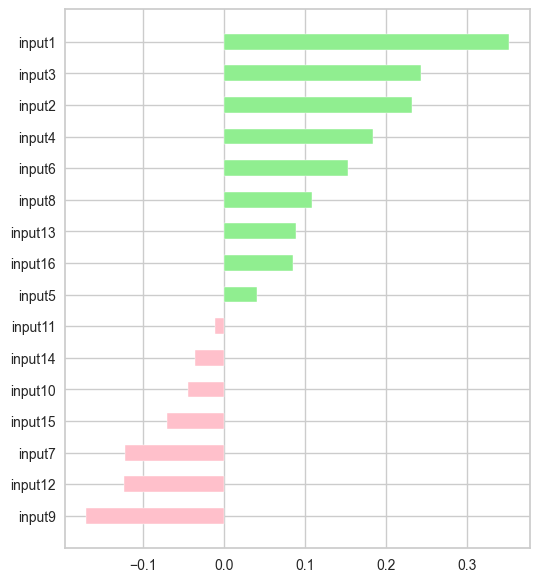

In [278]:
color1 = [('lightgreen' if p > 0 else 'pink') for p in df_corr_class['class']]
plt.figure(figsize=(6,7))

ax = plt.barh(df_corr_class.index,df_corr_class['class'],
              height = 0.5, 
              align='center',
              color=color1)

# Random Forest Classifier

In [279]:
X = df.drop('class',axis =1 )
y = df['class']

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,shuffle=False)

In [282]:
from sklearn.ensemble import RandomForestClassifier

In [283]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=101)

In [284]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [285]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred,digits=4))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred,digits=4))

In [286]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[218   0   0   0   0   0   0   0   3   0]
 [  0 216  12   0   0   0   0   1   0   0]
 [  0   1 222   1   0   0   0   1   0   0]
 [  0   0   0 219   0   0   0   0   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   1   0   0   0   1 219   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   2   1 219]]
              precision    recall  f1-score   support

           0     1.0000    0.9864    0.9932       221
           1     0.9908    0.9432    0.9664       229
           2     0.9447    0.9867    0.9652       225
           3     0.9821    1.0000    0.9910       219
           4     1.0000    1.0000    1.0000       242
           5     1.0000    0.9762    0.9880       210
           6     0.9953    1.0000    0.9976       210
           7     0.9821    0.9865    0.9843       222
           8     0.9803    1.0000    0.9900       199
           9     0.

In [287]:
model = RandomForestClassifier(random_state=101)

In [288]:
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.990447
test_precision_micro    0.990447
test_recall_micro       0.990447
test_f1_micro           0.990447
dtype: float64

## RF Model Feauture Importance

In [289]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
input16,0.110763
input14,0.097794
input11,0.080714
input10,0.075211
input15,0.070095
input8,0.069894
input5,0.064882
input9,0.061234
input12,0.054291
input2,0.054250


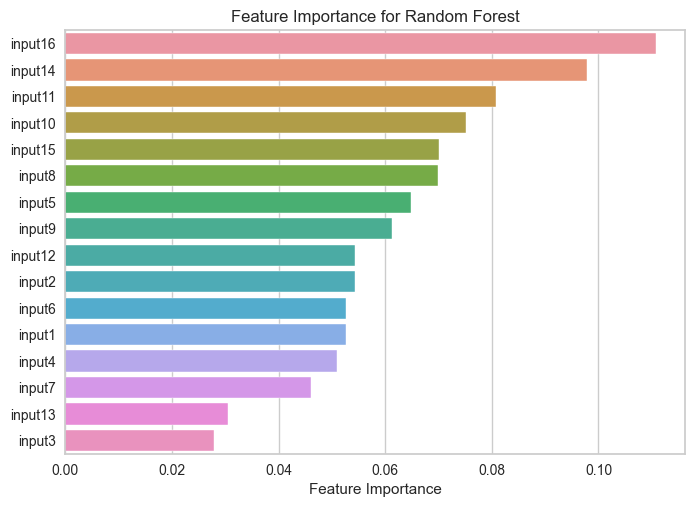

In [290]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

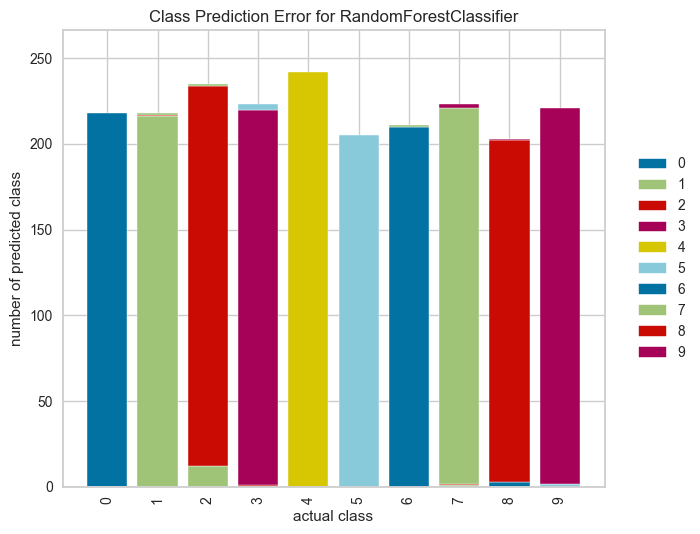

<AxesSubplot: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [291]:
visualizer = ClassPredictionError(rf_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

## RF GridsearchCV

In [292]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [293]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [294]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 200,
 'n_estimators': 50}

In [295]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [296]:
rf_f1 = f1_score(y_test,y_pred,average='macro')
rf_recall = recall_score(y_test, y_pred,average='macro')

In [322]:
rf_f1

0.9922812920945271

In [323]:
rf_recall

0.9923294836748667

In [324]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[217   0   0   0   0   0   0   0   4   0]
 [  0 214  14   0   0   0   0   1   0   0]
 [  0   2 220   0   0   0   0   3   0   0]
 [  0   1   0 216   0   2   0   0   0   0]
 [  0   0   0   0 241   0   0   0   0   1]
 [  0   0   0   4   0 199   0   0   1   6]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   4   2   2   0   0   0 213   1   0]
 [  1   0   0   0   0   0   0   0 198   0]
 [  0   1   0   2   0   1   0   2   1 215]]
              precision    recall  f1-score   support

           0     0.9954    0.9819    0.9886       221
           1     0.9640    0.9345    0.9490       229
           2     0.9322    0.9778    0.9544       225
           3     0.9643    0.9863    0.9752       219
           4     1.0000    0.9959    0.9979       242
           5     0.9851    0.9476    0.9660       210
           6     1.0000    1.0000    1.0000       210
           7     0.9726    0.9595    0.9660       222
           8     0.9659    0.9950    0.9802       199
           9     0.

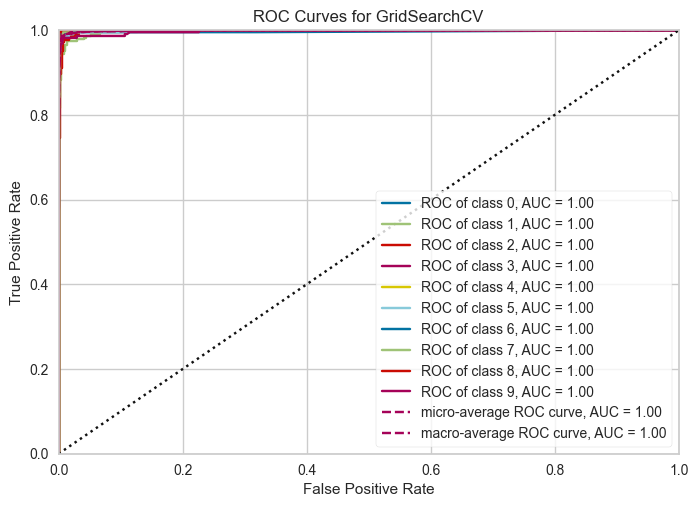

<AxesSubplot: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [298]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [299]:
false_predictions = sum(y_pred_test != y_test)
false_predictions

56

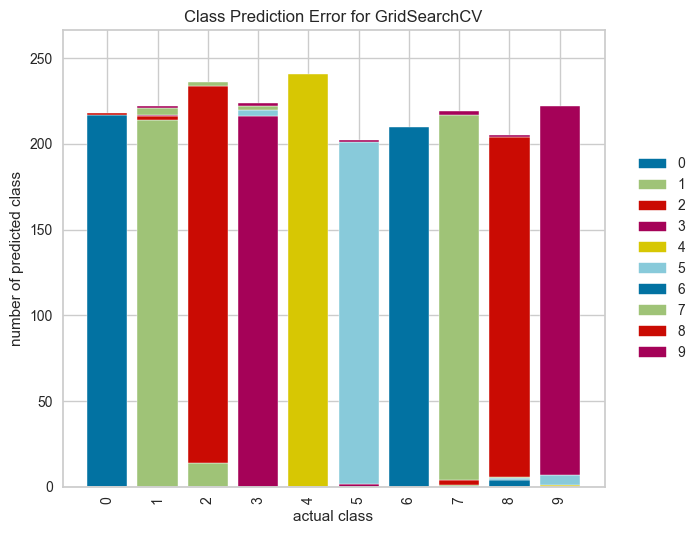

<AxesSubplot: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [300]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# Support Vector Machine (SVM) Classifier

In [301]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [302]:
scaler = MinMaxScaler()

In [303]:
modelSVM = SVC(kernel = 'rbf')

In [304]:
from sklearn.pipeline import Pipeline

In [305]:
modelSVM = Pipeline([('scaler',scaler),('SVM',modelSVM)])

In [306]:
modelSVM.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC())])

In [307]:
y_pred = modelSVM.predict(X_test)

In [308]:
y_pred_train = modelSVM.predict(X_train)

In [309]:
eval_metric(modelSVM,X_train,y_train,X_test,y_test)

Test_Set
[[219   0   0   0   0   0   0   0   2   0]
 [  0 224   4   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 240   2   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
              precision    recall  f1-score   support

           0     1.0000    0.9910    0.9955       221
           1     0.9912    0.9782    0.9846       229
           2     0.9825    0.9956    0.9890       225
           3     0.9864    0.9954    0.9909       219
           4     1.0000    0.9917    0.9959       242
           5     0.9903    0.9762    0.9832       210
           6     1.0000    1.0000    1.0000       210
           7     0.9822    0.9955    0.9888       222
           8     0.9851    1.0000    0.9925       199
           9     0.

## SVC GridsearchCV

In [310]:
param_grid = {'SVM__C':np.linspace(1,1.3,10),'SVM__gamma':['scale','auto']}

In [311]:
model = Pipeline([('scaler',scaler),('SVM',SVC(kernel='rbf'))])

In [312]:
svm_grid_model=GridSearchCV(model,param_grid,
               verbose=2,
               scoring='accuracy',
               n_jobs= -1)

In [313]:
svm_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [314]:
svm_grid_model.best_params_

{'SVM__C': 1.3, 'SVM__gamma': 'scale'}

In [315]:
svm_grid_model.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC(C=1.3))])

In [316]:
y_pred = svm_grid_model.predict(X_test)
y_pred_train = svm_grid_model.predict(X_train)
y_pred_proba =svm_grid_model.predict(X_test)

In [317]:
svc_f1 = f1_score(y_test,y_pred,average='macro')
svc_recall = recall_score(y_test, y_pred,average='macro')

In [325]:
svc_f1

0.9922812920945271

In [326]:
svc_recall

0.9923294836748667

In [318]:
eval_metric(svm_grid_model,X_train,y_train,X_test,y_test)

Test_Set
[[220   0   0   0   0   0   0   0   1   0]
 [  0 225   3   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 241   1   0   0   0   0]
 [  0   0   0   3   0 206   0   0   0   1]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
              precision    recall  f1-score   support

           0     1.0000    0.9955    0.9977       221
           1     0.9912    0.9825    0.9868       229
           2     0.9868    0.9956    0.9912       225
           3     0.9864    0.9954    0.9909       219
           4     1.0000    0.9959    0.9979       242
           5     0.9952    0.9810    0.9880       210
           6     1.0000    1.0000    1.0000       210
           7     0.9822    0.9955    0.9888       222
           8     0.9900    1.0000    0.9950       199
           9     0.

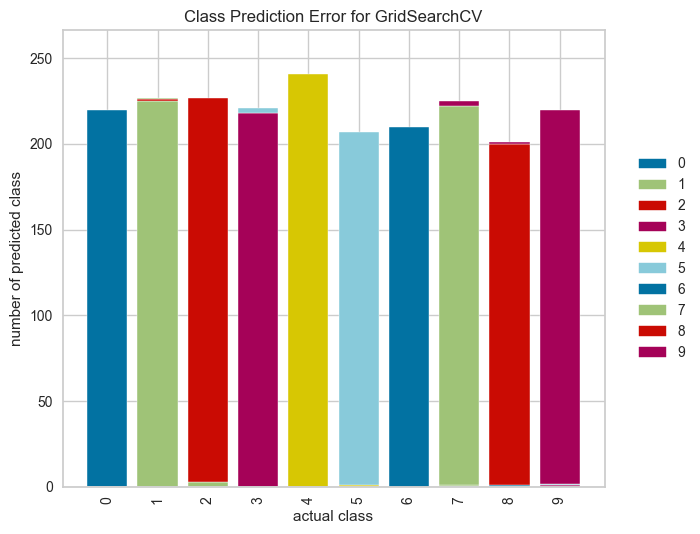

<AxesSubplot: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [319]:
visualizer = ClassPredictionError(svm_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

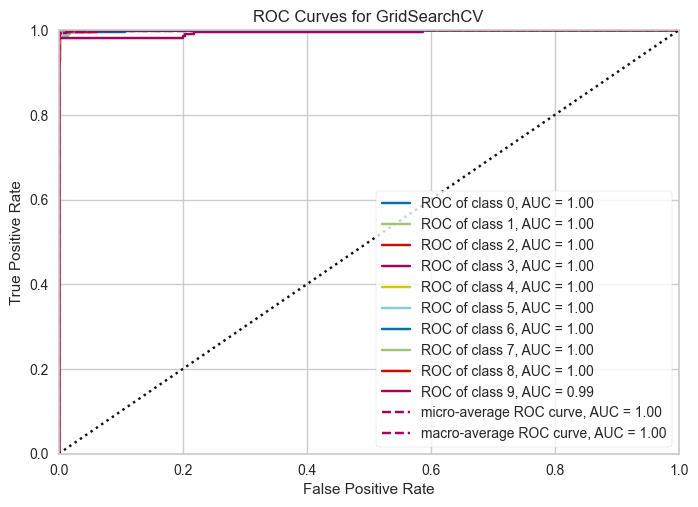

In [320]:
visualizer = ROCAUC(svm_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

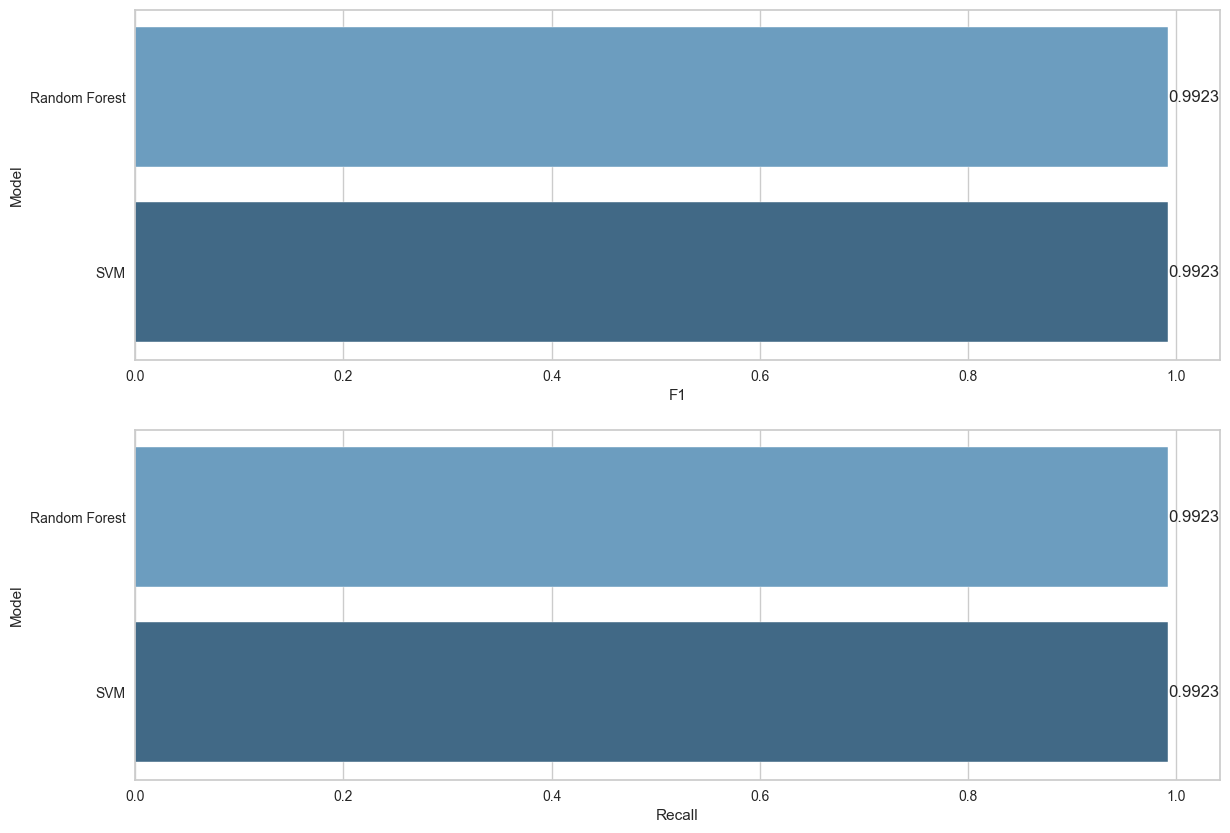

In [321]:
compare = pd.DataFrame({"Model": ["Random Forest", "SVM"],
                        "F1": [ svc_f1,rf_f1],
                        "Recall": [svc_recall, rf_recall]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.4f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)



## Conclusion

Despite the similarity in the Recall and F1 scores obtained from both models, there is a significant difference in their accuracy scores. Based on this analysis, we conclude that the Support Vector Machine (SVM) model outperforms the Random Forest model, and thus, we recommend the use of the SVM model."